# **Path Finder**

A classification project designed to predict field of career for students using a dataset from Kaggle, which includes academic performance, experience, and skills. 

**Goal : Predicting a suitable field for student**

## Problem and Task Understanding

Since the output of this project is displaying a suitable field of career for students and there are numerous of fields, this project belongs to the multi-classification. For this project, F1-score will be used for the evaluation metrics as it makes the observation of the model easier, such as the distribution of the data or some anomalies. The higher the F1-score, the better the model is. By the end of this model training, the expected performance is 75%.

# Setup

In this phase, some necessary libraries will be imported and the dataset is loaded and observed. By the end of this phase, it is hoped that there are some insights that can be gathered to guide the preprocessing and analysis phases effectively.

In [980]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [981]:
# Load Dataset
url = 'career_path_in_all_field.csv'
raw_df = pd.read_csv(url)
raw_df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,Engineering,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1
1,Chemistry,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1
2,Engineering,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1
3,Physics,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0
4,Law,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0


In [982]:
# Dataset Description
raw_df.describe()

,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.740375,4.514556,0.999778,2.009556,0.509778,4.500333,0.506556,2.010111,1.987444,2.011111,2.009556,2.005111,1.984111,1.989444,0.497667
std,0.719551,2.866867,0.816950,1.422330,0.499932,2.877968,0.499985,1.418062,1.411129,1.411260,1.411979,1.418441,1.419497,1.411539,0.500022
min,2.500093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.105267,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,3.739713,5.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,4.361090,7.000000,2.000000,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.999803,9.000000,2.000000,4.000000,1.000000,9.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [983]:
# Dataset Info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field                       9000 non-null   object 
 1   Career                      9000 non-null   object 
 2   GPA                         9000 non-null   float64
 3   Extracurricular_Activities  9000 non-null   int64  
 4   Internships                 9000 non-null   int64  
 5   Projects                    9000 non-null   int64  
 6   Leadership_Positions        9000 non-null   int64  
 7   Field_Specific_Courses      9000 non-null   int64  
 8   Research_Experience         9000 non-null   int64  
 9   Coding_Skills               9000 non-null   int64  
 10  Communication_Skills        9000 non-null   int64  
 11  Problem_Solving_Skills      9000 non-null   int64  
 12  Teamwork_Skills             9000 non-null   int64  
 13  Analytical_Skills           9000 

Based on the information of the dataset, there are 9000 entries along with 17 features, all of which contain no missing value yet encompassing various data types, such as object, integer, and float. Therefore, it is ready to proceed to the next phase.

# Data Preprocessing

After observing the data, this phase aims to clean, preprocess, and organize the data for analysis. Hopefully, the dataset is ready to be used for training the model later after going through this phase.

In [984]:
# Copy a Dataset
df = raw_df.copy()

In [985]:
# Check Duplicate
duplicated = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated}")

Number of duplicate rows: 0


In [986]:
# Split the Data Types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

In [987]:
# Round GPA to 2 Decimal
df['GPA'] = df['GPA'].round(2)

## Univariate Data Visualization

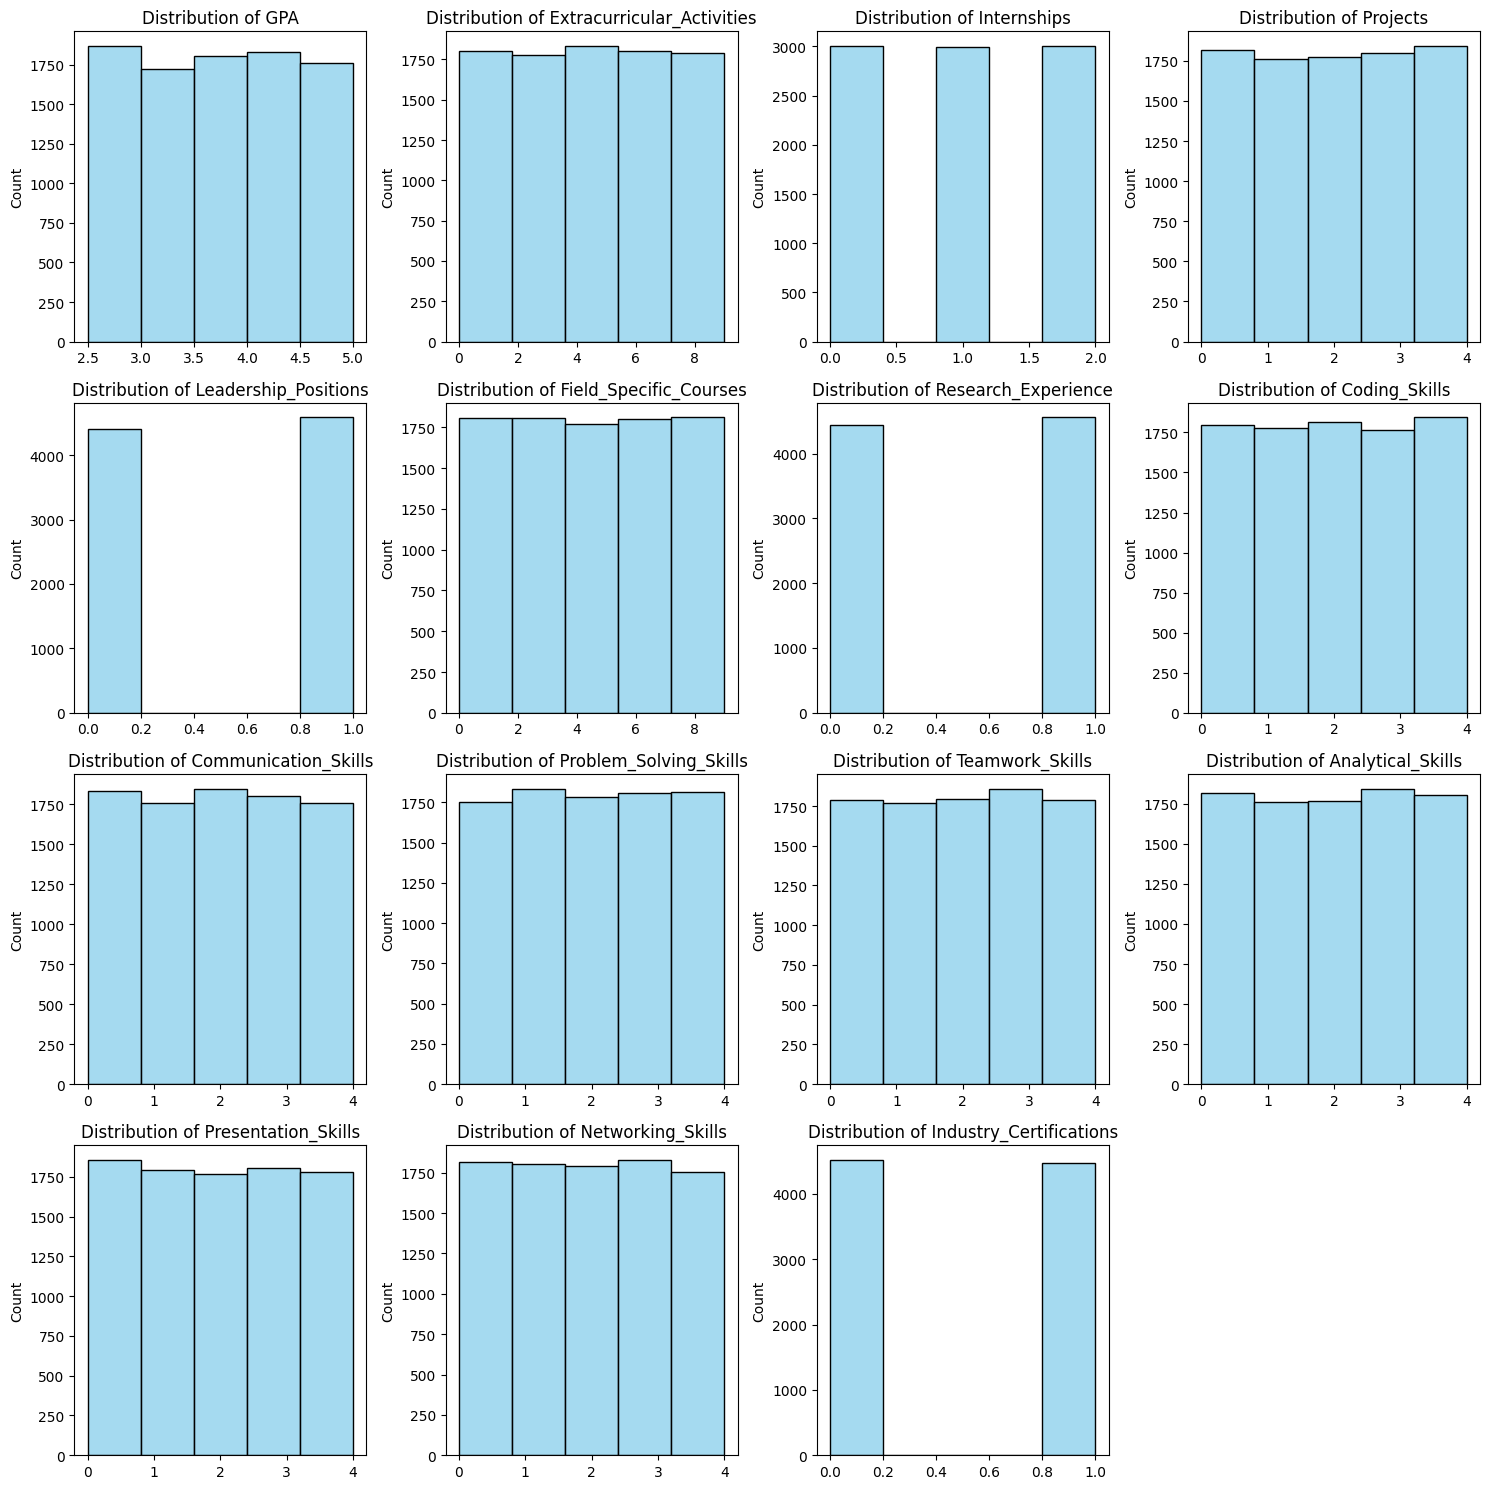

In [988]:
# Univariate for Discrete Features (0-4 range)
fig, axes = plt.subplots(nrows=len(numerical_features) // 4 + 1, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, bins=5, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

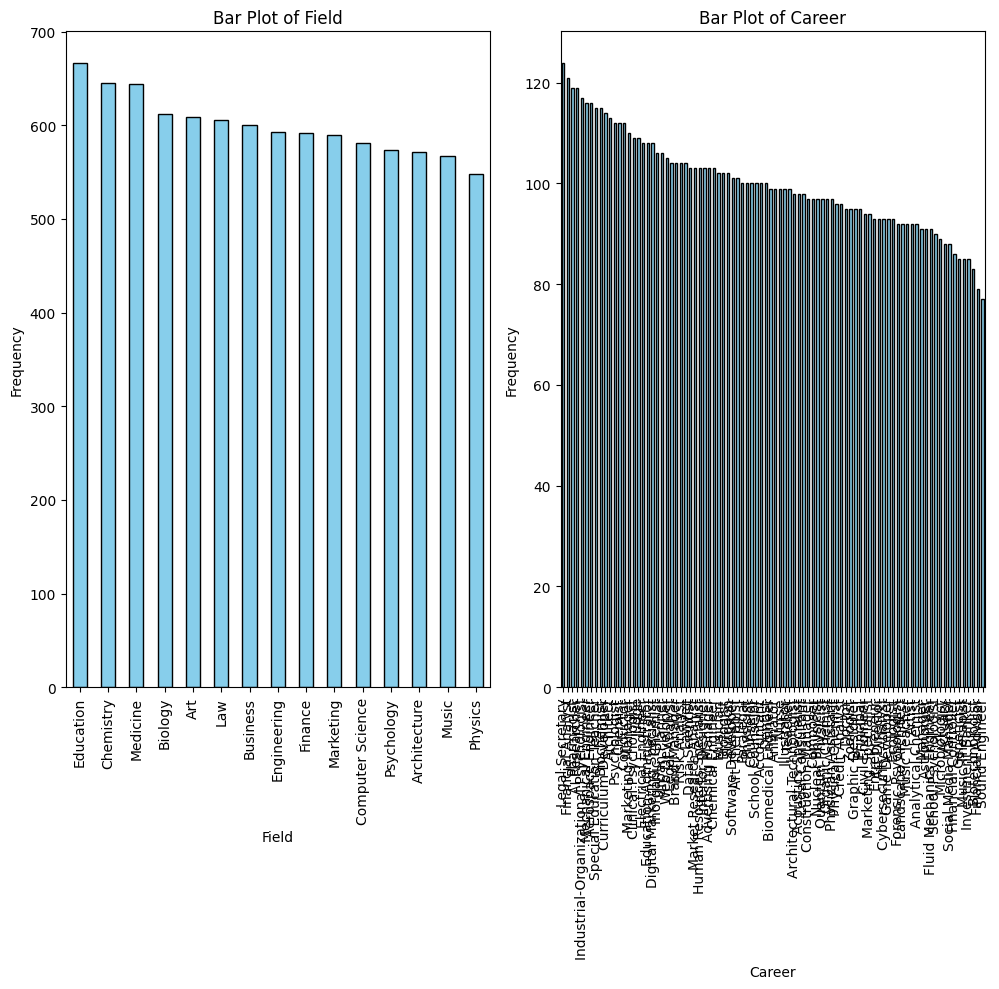

In [989]:
# Univariate for Categorical Features
fig, axes = plt.subplots(nrows=len(categorical_features) // 3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [990]:
# Check the Unique Value of Career Column
print(f"Number of unique value of career features are {df['Career'].unique().size}")

# Drop Career Column
df = df.drop(columns='Career')

Number of unique value of career features are 90


## Feature Engineering

In [991]:
# Combine Classes
arts = ['Art', 'Music']
social_sciences = ['Education', 'Law']
# engineering= ['Architecture', 'Engineering', 'Computer Science']
health_sciences = ['Medicine', 'Psychology']
natural_sciences = ['Biology', 'Chemistry', 'Physics']
# business_managements = ['Business', 'Finance', 'Marketing']

In [992]:
# Define mapping for fields
def map_field(field):
    if field in arts:
        return 'Art & Music'
    elif field in social_sciences:
        return 'Social Sciences'
    # elif field in engineering:
    #     return 'Engineering'
    elif field in health_sciences:
        return 'Health Sciences'
    elif field in natural_sciences:
        return 'Natural Sciences'
    # elif field in business_managements:
    #     return 'Business and Management'
    else:
        return field

# Apply the mapping
df['Field'] = df['Field'].apply(map_field)

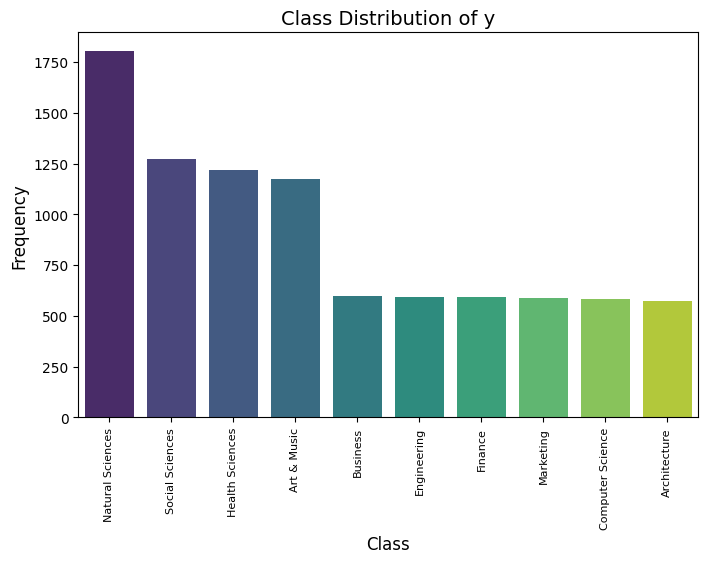

In [993]:
# Visualize Target Distribution
class_counts = df['Field'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of y", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [994]:
# Create Soft Skill Feature
soft_skills = [
    'Communication_Skills',
    'Teamwork_Skills',
    'Presentation_Skills',
    'Networking_Skills',
    'Problem_Solving_Skills',
]

In [995]:
# Create Technical Skills
technical_skills = [
    'Coding_Skills',
    'Field_Specific_Courses',
    'Research_Experience',
    'Industry_Certifications',
    'Analytical_Skills'
]

In [996]:
# Create Leadership Skills
proactive_engagement = [
    'Leadership_Positions',
    'Extracurricular_Activities',
    'Projects',
    'Internships'
]

In [997]:
# Create New Features with the average of Soft Skill, Technical Skill, Proactive Engagement
df['Soft_Skills'] = df[soft_skills].mean(axis=1)
df['Technical_Skills'] = df[technical_skills].mean(axis=1)
df['Proactive_Engagement'] = df[proactive_engagement].mean(axis=1)

In [998]:
# Drop Columns from Soft Skill, Technical Skill, Proactive Engagement
features_to_drop = soft_skills + technical_skills + proactive_engagement
df = df.drop(columns=features_to_drop)

## Encoding

In [999]:
# Import Library
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [1000]:
# Encode Field
label_encoder = LabelEncoder()
df['Field'] = label_encoder.fit_transform(df['Field'])
df.head()

,Field,GPA,Soft_Skills,Technical_Skills,Proactive_Engagement
0,4,3.53,1.8,2.0,1.75
1,8,4.02,2.0,2.6,0.75
2,4,4.64,2.2,1.8,0.25
3,8,4.05,1.6,1.4,1.75
4,9,4.83,3.2,1.6,1.50


In [1001]:
# Description after Encoding
df.describe()

,Field,GPA,Soft_Skills,Technical_Skills,Proactive_Engagement
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,5.198444,3.740376,1.996333,1.903956,2.008417
std,3.005155,0.719539,0.632919,0.714420,0.833425
min,0.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,3.110000,1.600000,1.400000,1.250000
50%,6.000000,3.740000,2.000000,2.000000,2.000000
75%,8.000000,4.360000,2.400000,2.400000,2.750000
max,9.000000,5.000000,4.000000,3.800000,4.000000


## Multivariate Data Visualization

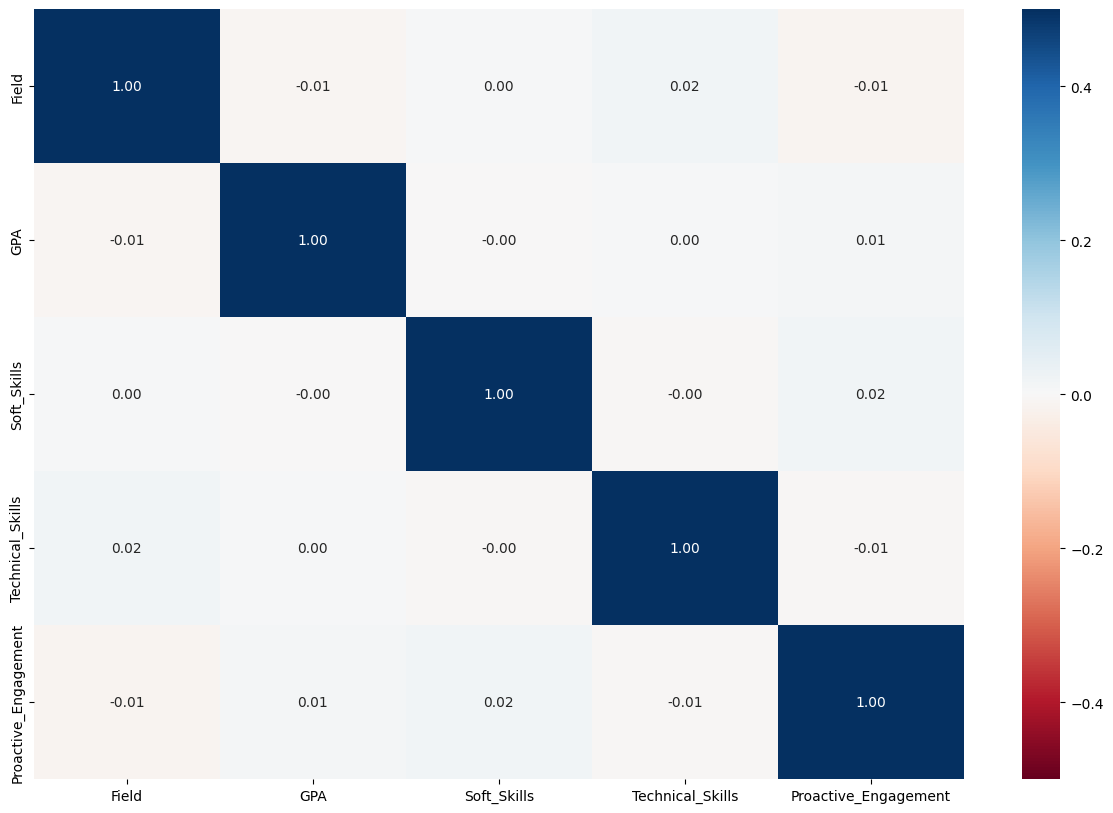

In [1002]:
# Multivariate by Heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), vmax=0.5, vmin=-0.5, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

<Axes: ylabel='Density'>

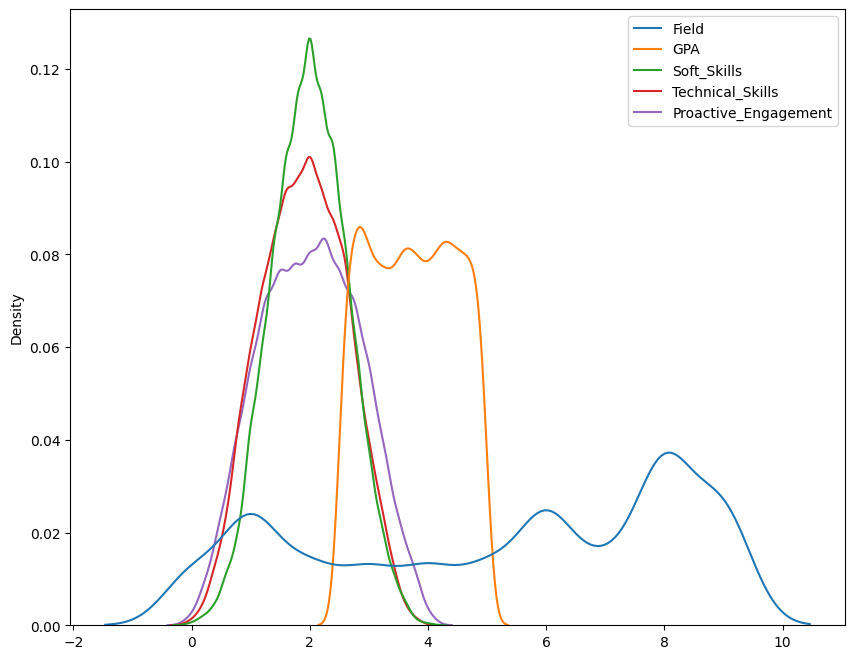

In [1003]:
# Visualize the Dispersion of the Features
plt.figure(figsize=(10, 8))
sns.kdeplot(df)

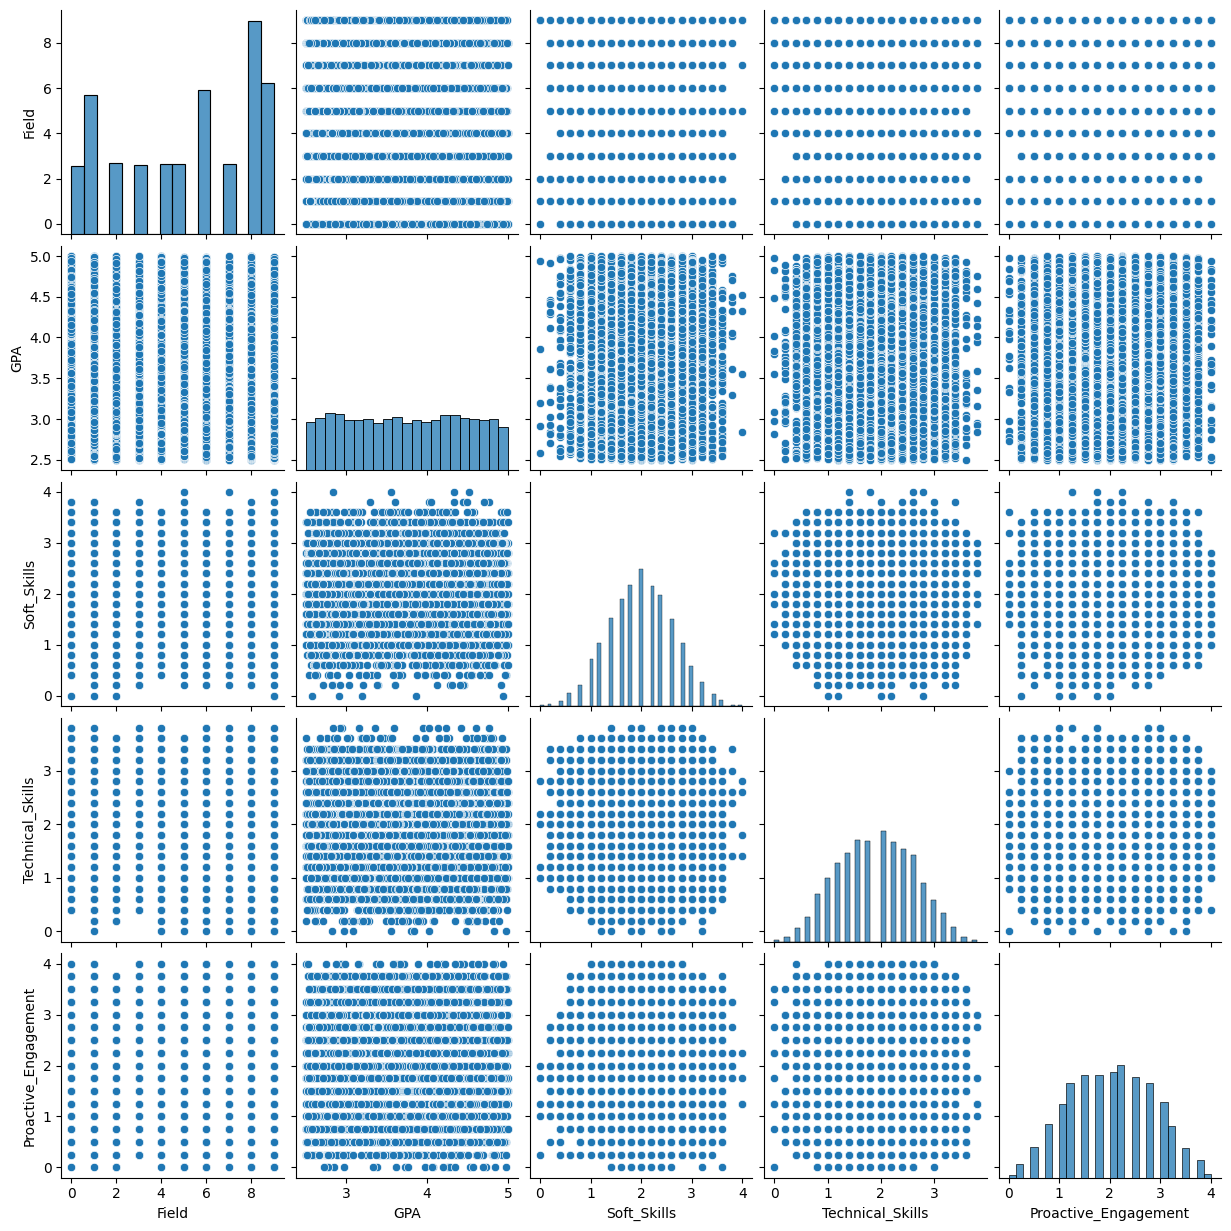

In [1004]:
sns.pairplot(df)

## Sampling

In [1005]:
# Import Library
from imblearn.over_sampling import RandomOverSampler

In [1006]:
# Assign Independence and Target Feature
X, y = df.loc[:, df.columns != 'Field'], df.loc[:, 'Field']

In [1007]:
# Check Target Feature
print(y.value_counts())

Field
8    1805
9    1273
6    1218
1    1176
2     600
4     593
5     592
7     590
3     581
0     572
Name: count, dtype: int64


In [1008]:
# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Class distribution after Random Oversampling:\n", pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
 Field
4    1805
8    1805
9    1805
7    1805
6    1805
3    1805
2    1805
0    1805
1    1805
5    1805
Name: count, dtype: int64


## Standardization

In [1009]:
# Import Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X_resampled.columns)
X_scaled.head()

,GPA,Soft_Skills,Technical_Skills,Proactive_Engagement
0,0.412,0.45,0.526316,0.4375
1,0.608,0.50,0.684211,0.1875
2,0.856,0.55,0.473684,0.0625
3,0.620,0.40,0.368421,0.4375
4,0.932,0.80,0.421053,0.3750


<Axes: ylabel='Density'>

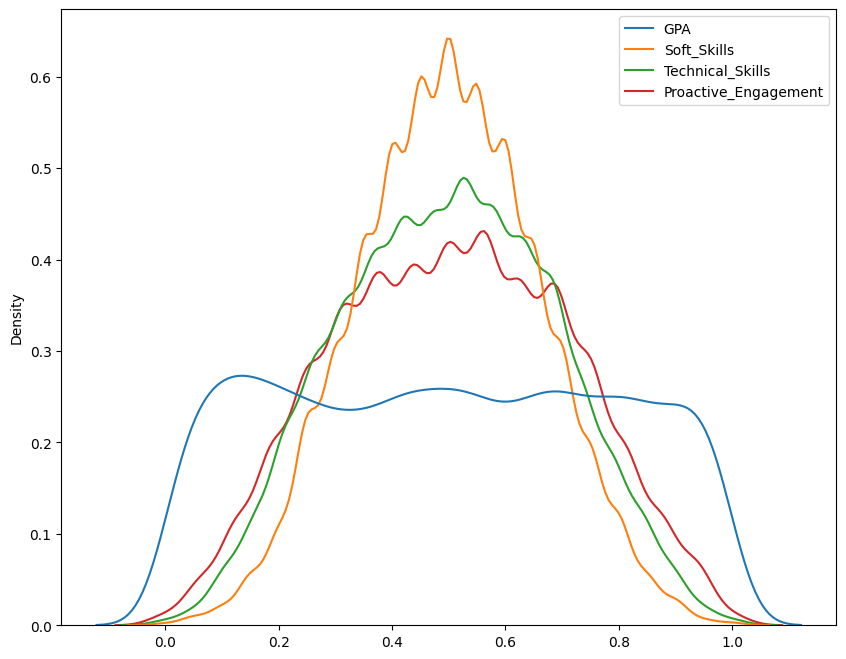

In [1010]:
# Visualize the Scaled Dispersion
plt.figure(figsize=(10, 8))
sns.kdeplot(X_scaled)

## Output

The dataset is successfully preprocessed by unifying some features and classes, dropping some unnecessary features, encoding, sampling, and standardizing the data. Performing such preprocessed approach optimizes the performance of the model. Here are the reasons why those approaches are conducted.

1. Unify Features : based on the correlation, most of the features don't have a significant impact on the target variable (non-linear). In order to simplify it, unifying the similar feature by its characteristic will assist to better the model performance
2. Unify Classes : the dataset already has 13 classes that causes confusion or low performance for the model. Therefore, unifying the classes will help to simplify and better the model's prediction
3. Drop Features : there are some features that need to be dropped because it doesn't align with the goal of this project
4. Encoding : this process allows some features to be assigned as discrete values
5. Sampling : conducting this process helps to solve the imbalance problem. For this project, the best sampling for the performance of the model is oversampling
6. Standardizing : this process will allow some features to be scaled based on scaler characteristic. What's more, the features of this dataset has multiple kind of ranges

# Model Benchmarking

Next, the preprocessed data will be fitted with the model. Because there are numerous classification models, the model benchmarking is necessary to find the suitable model for this project. This phase will limit the number of the models to 5 that consist of
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest
4. Super Vector Machine
5. Gradient Boost Machine
6. XGboost

In [1011]:
# Import Library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

In [1012]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

## Baseline

In [1013]:
# Initialize Model
models = {
    "Logistic Regression" : LogisticRegression(random_state= 42),
    "K-Nearest Neighbor" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(random_state= 42),
    "Support Vector Machine" : SVC(random_state= 42),
    "Gradient Boost Machine" : GradientBoostingClassifier(random_state= 42),
    "XGBoost" : XGBClassifier()
}

results = []

In [1014]:
# Cross Validation
cv_results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1_weighted")
    cv_results[model_name] = cv_scores
    print(f"{model_name} Cross-Validation Results: {cv_scores}")
    print(f"Mean CV F1-Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Cross-Validation Results: [0.08780317 0.09577433 0.07564064 0.08391761 0.08113975]
Mean CV F1-Score: 0.0849 ± 0.0067
K-Nearest Neighbor Cross-Validation Results: [0.34453192 0.34475803 0.33369691 0.34340624 0.33320593]
Mean CV F1-Score: 0.3399 ± 0.0053
Random Forest Cross-Validation Results: [0.65674967 0.65848171 0.65904059 0.66114488 0.66112684]
Mean CV F1-Score: 0.6593 ± 0.0017
Support Vector Machine Cross-Validation Results: [0.1261323  0.13234508 0.12714128 0.127795   0.12725401]
Mean CV F1-Score: 0.1281 ± 0.0022
Gradient Boost Machine Cross-Validation Results: [0.19105142 0.21782131 0.20883969 0.20678103 0.2159885 ]
Mean CV F1-Score: 0.2081 ± 0.0095
XGBoost Cross-Validation Results: [0.46527347 0.4564336  0.47591481 0.47727748 0.47380018]
Mean CV F1-Score: 0.4697 ± 0.0079


### Logistic Regression

In [1015]:
# Fit the Model
regression = models['Logistic Regression'].fit(X_train, y_train)

# Prediction
y_pred_regression = regression.predict(X_test)

In [1016]:
# Classification Report
print(classification_report(y_test, y_pred_regression))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       362
           1       0.12      0.10      0.11       354
           2       0.13      0.31      0.18       374
           3       0.06      0.01      0.01       369
           4       0.11      0.10      0.11       371
           5       0.11      0.10      0.10       341
           6       0.00      0.00      0.00       372
           7       0.10      0.30      0.15       332
           8       0.09      0.09      0.09       372
           9       0.11      0.09      0.10       363

    accuracy                           0.11      3610
   macro avg       0.08      0.11      0.08      3610
weighted avg       0.08      0.11      0.08      3610



In [1017]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_regression, average="macro")
weighted_f1 = f1_score(y_test, y_pred_regression, average="weighted")
accuracy = accuracy_score(y_test, y_pred_regression)

results.append({
    "Model" : 'Logistic Regression',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Logistic Regression'].mean(),
    "CV Mean Std" : cv_results['Logistic Regression'].std()
})

### K-Nearest Neighbors

In [1018]:
# Fit the Model
knn = models['K-Nearest Neighbor'].fit(X_train, y_train)

# Prediction
y_pred_knn = knn.predict(X_test)

In [1019]:
# Classification Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.67      0.54       362
           1       0.23      0.25      0.24       354
           2       0.47      0.62      0.53       374
           3       0.48      0.65      0.55       369
           4       0.47      0.52      0.49       371
           5       0.46      0.59      0.52       341
           6       0.33      0.18      0.23       372
           7       0.48      0.61      0.54       332
           8       0.12      0.03      0.05       372
           9       0.27      0.10      0.15       363

    accuracy                           0.42      3610
   macro avg       0.38      0.42      0.38      3610
weighted avg       0.38      0.42      0.38      3610



In [1020]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_knn, average="macro")
weighted_f1 = f1_score(y_test, y_pred_knn, average="weighted")
accuracy = accuracy_score(y_test, y_pred_knn)

results.append({
    "Model" : 'K-Nearest Neighbor',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['K-Nearest Neighbor'].mean(),
    "CV Mean Std" : cv_results['K-Nearest Neighbor'].std()
})

### Random Forest

In [1021]:
# Fit the Model
randfor = models['Random Forest'].fit(X_train, y_train)

# Prediction
y_pred_randfor = randfor.predict(X_test)

In [1022]:
# Classification Report
print(classification_report(y_test, y_pred_randfor))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       362
           1       0.60      0.56      0.58       354
           2       0.77      0.91      0.83       374
           3       0.80      0.94      0.86       369
           4       0.81      0.91      0.86       371
           5       0.80      0.89      0.84       341
           6       0.66      0.55      0.60       372
           7       0.82      0.90      0.86       332
           8       0.28      0.16      0.21       372
           9       0.57      0.50      0.53       363

    accuracy                           0.72      3610
   macro avg       0.69      0.72      0.70      3610
weighted avg       0.69      0.72      0.70      3610



In [1023]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_randfor, average="macro")
weighted_f1 = f1_score(y_test, y_pred_randfor, average="weighted")
accuracy = accuracy_score(y_test, y_pred_randfor)

results.append({
    "Model" : 'Random Forest',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Random Forest'].mean(),
    "CV Mean Std" : cv_results['Random Forest'].std()
})

### Support Vector Machine

In [1024]:
# Fit the Model
svm = models['Support Vector Machine'].fit(X_train, y_train)

# Prediction
y_pred_svm = svm.predict(X_test)

In [1025]:
# Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.17      0.18      0.17       362
           1       0.09      0.07      0.08       354
           2       0.15      0.18      0.16       374
           3       0.15      0.18      0.16       369
           4       0.14      0.13      0.14       371
           5       0.13      0.16      0.14       341
           6       0.19      0.06      0.10       372
           7       0.12      0.32      0.17       332
           8       0.10      0.04      0.05       372
           9       0.16      0.07      0.10       363

    accuracy                           0.14      3610
   macro avg       0.14      0.14      0.13      3610
weighted avg       0.14      0.14      0.13      3610



In [1026]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_svm, average="macro")
weighted_f1 = f1_score(y_test, y_pred_svm, average="weighted")
accuracy = accuracy_score(y_test, y_pred_svm)

results.append({
    "Model" : 'Support Vector Machine',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Support Vector Machine'].mean(),
    "CV Mean Std" : cv_results['Support Vector Machine'].std()
})

### Gradient Boost Machine

In [1027]:
# Fit the Model
gbm = models['Gradient Boost Machine'].fit(X_train, y_train)

# Prediction
y_pred_gbm = gbm.predict(X_test)

In [1028]:
# Classification Report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31       362
           1       0.17      0.15      0.16       354
           2       0.23      0.31      0.26       374
           3       0.27      0.24      0.26       369
           4       0.22      0.25      0.23       371
           5       0.22      0.25      0.24       341
           6       0.19      0.13      0.16       372
           7       0.22      0.34      0.27       332
           8       0.13      0.08      0.10       372
           9       0.20      0.16      0.18       363

    accuracy                           0.22      3610
   macro avg       0.22      0.22      0.22      3610
weighted avg       0.22      0.22      0.22      3610



In [1029]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_gbm, average="macro")
weighted_f1 = f1_score(y_test, y_pred_gbm, average="weighted")
accuracy = accuracy_score(y_test, y_pred_gbm)

results.append({
    "Model" : 'Gradient Boost Machine',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['Gradient Boost Machine'].mean(),
    "CV Mean Std" : cv_results['Gradient Boost Machine'].std()
})

### XGBoost

In [1030]:
# Fit the Model
xgb = models['XGBoost'].fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb.predict(X_test)

In [1031]:
# Classification Report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       362
           1       0.38      0.36      0.37       354
           2       0.57      0.69      0.62       374
           3       0.59      0.63      0.61       369
           4       0.58      0.62      0.60       371
           5       0.56      0.64      0.60       341
           6       0.47      0.35      0.40       372
           7       0.55      0.67      0.60       332
           8       0.18      0.12      0.15       372
           9       0.38      0.34      0.36       363

    accuracy                           0.50      3610
   macro avg       0.48      0.51      0.49      3610
weighted avg       0.48      0.50      0.49      3610



In [1032]:
# Save Result
macro_f1 = f1_score(y_test, y_pred_xgb, average="macro")
weighted_f1 = f1_score(y_test, y_pred_xgb, average="weighted")
accuracy = accuracy_score(y_test, y_pred_xgb)

results.append({
    "Model" : 'XGBoost',
    "Accuracy" : accuracy,
    "Macro F1-Score" : macro_f1,
    "Weighted F1-Score" : weighted_f1,
    "CV Mean Score" : cv_results['XGBoost'].mean(),
    "CV Mean Std" : cv_results['XGBoost'].std()
})

# Analyze Baseline

In [1033]:
# Comparison Model
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Weighted F1-Score", ascending=False)

results_df

,Model,Accuracy,Macro F1-Score,Weighted F1-Score,CV Mean Score,CV Mean Std
2,Random Forest,0.721607,0.704878,0.702494,0.659309,0.001672
5,XGBoost,0.503047,0.491541,0.489983,0.469740,0.007854
1,K-Nearest Neighbor,0.418560,0.384182,0.382150,0.339920,0.005304
4,Gradient Boost Machine,0.221607,0.215634,0.215002,0.208096,0.009483
3,Support Vector Machine,0.137396,0.128557,0.128095,0.128134,0.002173
0,Logistic Regression,0.108587,0.084722,0.084073,0.084855,0.006746


## Random Forest

### Hyperparameter Tuning

In [1034]:
from sklearn.model_selection import GridSearchCV

In [1035]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', None],
}


In [1036]:
grid_search = GridSearchCV(
    estimator=randfor,
    param_grid=param_dist,
    scoring='f1_weighted',  
    cv=5,                
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted', verbose=2)

In [1037]:
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

In [1038]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weigthed Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 Weigthed Score: 0.66260556450818


In [1039]:
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       362
           1       0.60      0.55      0.57       354
           2       0.78      0.91      0.84       374
           3       0.80      0.94      0.86       369
           4       0.82      0.91      0.86       371
           5       0.80      0.89      0.84       341
           6       0.65      0.55      0.60       372
           7       0.80      0.90      0.85       332
           8       0.27      0.16      0.20       372
           9       0.57      0.50      0.53       363

    accuracy                           0.72      3610
   macro avg       0.69      0.72      0.70      3610
weighted avg       0.69      0.72      0.70      3610



## XGBoost

### Hyperparameter Tuning

In [1040]:
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.001, 0.01, 0.05],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.7, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit grid search on resampled data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=10,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.001, 0.01, 0.05],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [150, 250, 350],
                         'subsample': [0.6, 0.8]},
             scoring='f1_weighted')

In [1041]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Weigthed Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 350, 'subsample': 0.8}
Best F1 Weigthed Score: 0.5918077594321529


In [1042]:
# Best model
best_xgb_model = grid_search.best_estimator_

# best_xgb_model.scale_pos_weight = {0: 1, 1: 1.5, 2: 12, 3: 1, 4: 1, 5: 1, 6: 1.5, 7: 1, 8: 12}
# best_xgb_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = best_xgb_model.predict(X_test)
print("Classification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       362
           1       0.48      0.49      0.49       354
           2       0.72      0.80      0.76       374
           3       0.74      0.81      0.77       369
           4       0.73      0.77      0.75       371
           5       0.72      0.81      0.76       341
           6       0.59      0.46      0.52       372
           7       0.69      0.82      0.75       332
           8       0.28      0.17      0.21       372
           9       0.48      0.43      0.45       363

    accuracy                           0.64      3610
   macro avg       0.62      0.64      0.63      3610
weighted avg       0.62      0.64      0.62      3610



## Stacking Ensemble

In [1043]:
# Define the base models
rf_base = best_rf_model
xgb_base = best_xgb_model

# Define the meta-model
meta_model = XGBClassifier()

In [1044]:
# Create the stacking classifier
stacked_model = StackingClassifier(
    estimators=[
        ('Random Forest', rf_base),
        ('XGBoost', xgb_base)
    ],
    final_estimator=meta_model,
    cv=5,  # Use cross-validation to train the meta-model
    n_jobs=-1  # Parallel computation
)

In [1045]:
# Train the stacking classifier
stacked_model.fit(X_train, y_train)

# Evaluate the ensemble on the test set
y_pred = stacked_model.predict(X_test)

# Print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       362
           1       0.62      0.57      0.59       354
           2       0.96      0.90      0.93       374
           3       0.97      0.92      0.94       369
           4       0.97      0.90      0.93       371
           5       0.96      0.88      0.92       341
           6       0.61      0.58      0.59       372
           7       0.96      0.87      0.91       332
           8       0.31      0.48      0.37       372
           9       0.55      0.53      0.54       363

    accuracy                           0.75      3610
   macro avg       0.79      0.75      0.77      3610
weighted avg       0.79      0.75      0.77      3610



In [1046]:
# Hyperparameter grid for the meta-model (XGBoost)
param_grid = {
    'final_estimator__n_estimators': [150, 250],
    'final_estimator__learning_rate': [0.0005, 0.001, 0.01],
    'final_estimator__max_depth': [3, 5, 7],
    'final_estimator__subsample': [0.7, 0.9]
}

# Grid Search with Cross-validation
grid_search = GridSearchCV(estimator=stacked_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'final_estimator__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 250, 'final_estimator__subsample': 0.9}
Best cross-validation score: 0.7462997710368267

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       362
           1       0.90      0.50      0.64       354
           2       0.95      0.90      0.93       374
           3       0.94      0.93      0.94       369
           4       0.97      0.91      0.94       371
           5       0.96      0.88      0.92       341
           6       0.92      0.50      0.65       372
           7       0.96      0.87      0.91       332
           8       0.32      0.85      0.46       372
           9       0.85      0.43      0.57       363

    accuracy                           0.77      3610
   macro avg       0.87      0.77      0.79      3610
weighted avg       0.87      0.77      0.79      3610



# Export Model

In [1048]:
import joblib

# Assuming you have a trained model
joblib.dump(model, 'PathFinder.pkl')

['PathFinder.pkl']